In [2]:
!pip install pandas matplotlib statsmodels scikit-learn


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.6 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 5.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 6.0 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 6.1 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.6 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/8.9 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.9 MB 6.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/8.9 MB 7.2 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


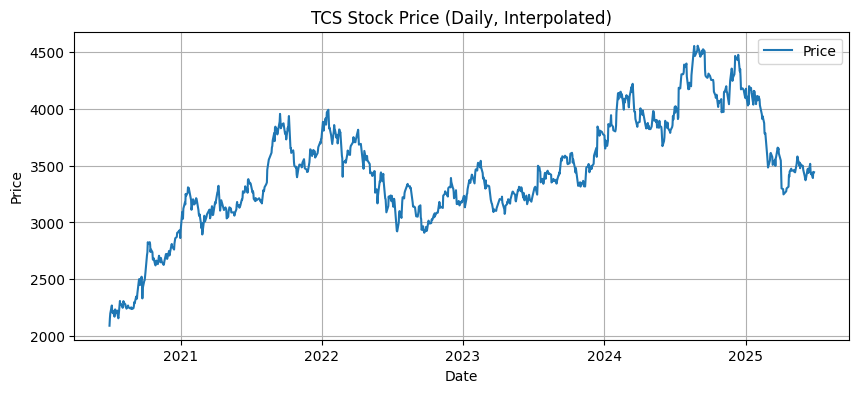

In [10]:
# Load cleaned TCS data
df = pd.read_csv("TCS_Cleaned_Data (2).csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Ensure daily frequency and fill gaps
df = df.asfreq("D")
df["Price"] = df["Price"].interpolate()

# Quick plot to verify
plt.figure(figsize=(10, 4))
plt.plot(df["Price"], label="Price")
plt.title("TCS Stock Price (Daily, Interpolated)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
# Reserve last 30 days for testing
train = df["Price"][:-30]
test  = df["Price"][-30:]

print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 1793, Test size: 30


In [12]:
# Fit ARIMA(p=5,d=1,q=0)
model     = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1793
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8687.813
Date:                Sun, 27 Jul 2025   AIC                          17387.626
Time:                        13:59:14   BIC                          17420.573
Sample:                    07-01-2020   HQIC                         17399.791
                         - 05-28-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1423      0.016      8.848      0.000       0.111       0.174
ar.L2          0.0414      0.023      1.840      0.066      -0.003       0.086
ar.L3          0.0263      0.039      0.667      0.5

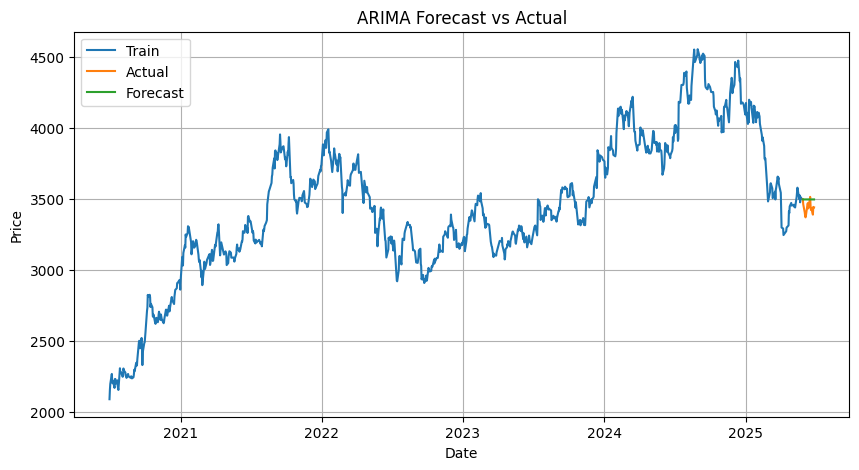

In [13]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast.index = test.index

# Plot train, test, forecast
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test,   label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae  = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")


RMSE: 69.47
MAE:  61.37
